In [33]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Read in CSV
df = pd.read_csv("mushroom_cleaned.csv")
print(df.shape)
df.head()

(54035, 9)


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [36]:
df.shape

(54035, 9)

In [37]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [38]:
df.duplicated().sum()

303

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.shape

(53732, 9)

In [106]:
# df['cap-shape'].unique()
# df['gill-attachment'].unique()
# df['gill-color'].unique()
# df['stem-color'].unique()
# df['season'].unique()

array([11, 12,  6, 10,  0,  5,  9,  8,  1,  4,  3,  7,  2], dtype=int64)

In [41]:
# Encoding, separate out features
num_features = ['cap-diameter', 'stem-height', 'stem-width']
cat_features = ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season', 'class']

In [42]:
df_num = df.loc[:, num_features]
df_num.describe()

,cap-diameter,stem-height,stem-width
count,53732.000000,53732.000000,53732.000000
mean,568.629178,0.752102,1057.000633
std,360.384461,0.645987,780.263033
min,0.000000,0.000426,0.000000
25%,290.000000,0.270146,430.000000
50%,528.000000,0.589316,929.000000
75%,782.000000,1.046900,1527.000000
max,1891.000000,3.835320,3569.000000


In [43]:
# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_num)

# predict/transform
scaled_data = scaler.transform(df_num)
df_scaled = pd.DataFrame(scaled_data, columns=num_features)

df_scaled.head()

,cap-diameter,stem-height,stem-width
0,2.229226,4.729807,0.625435
1,2.476186,4.729807,0.640815
2,2.226451,4.427986,0.652349
3,1.921218,4.699009,0.652349
4,2.043311,4.581976,0.521623


In [44]:
df_final = pd.concat([df_scaled, df[cat_features].reset_index(drop=True)], axis=1)

In [45]:
# correlation analysis
corrs = df_final.corr()
corrs

,cap-diameter,stem-height,stem-width,cap-shape,gill-attachment,gill-color,stem-color,season,class
cap-diameter,1.000000,0.144586,0.828750,0.202713,0.201199,0.183694,0.115885,0.114201,-0.162830
stem-height,0.144586,1.000000,0.114337,-0.005523,-0.075565,0.024556,0.024320,0.000549,0.175839
stem-width,0.828750,0.114337,1.000000,0.220292,0.246361,0.105096,0.144907,0.040559,-0.177310
cap-shape,0.202713,-0.005523,0.220292,1.000000,0.043001,0.129980,0.024224,0.055653,-0.131385
gill-attachment,0.201199,-0.075565,0.246361,0.043001,1.000000,0.104881,0.019674,-0.040929,-0.052397
gill-color,0.183694,0.024556,0.105096,0.129980,0.104881,1.000000,0.179777,0.060660,-0.060166
stem-color,0.115885,0.024320,0.144907,0.024224,0.019674,0.179777,1.000000,0.010003,-0.119940
season,0.114201,0.000549,0.040559,0.055653,-0.040929,0.060660,0.010003,1.000000,-0.083363
class,-0.162830,0.175839,-0.177310,-0.131385,-0.052397,-0.060166,-0.119940,-0.083363,1.000000


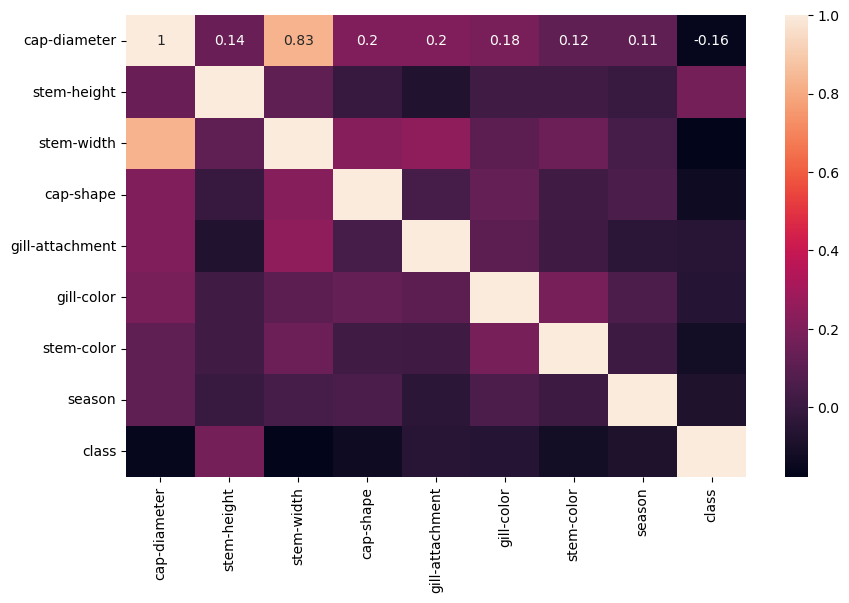

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(corrs, annot=True)
plt.show()

In [47]:
X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) 
print(X_train.shape, X_test.shape)

(40299, 8) (13433, 8)


In [48]:
X.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195


In [49]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) 
print(X_train.shape, X_test.shape)

(40299, 8) (13433, 8)


In [51]:
# Function for Classification
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[ 9623  8647]
 [ 6435 15594]]
    
    AUC: 0.6758706907297871

    Classification Report:
                  precision    recall  f1-score   support

           0       0.60      0.53      0.56     18270
           1       0.64      0.71      0.67     22029

    accuracy                           0.63     40299
   macro avg       0.62      0.62      0.62     40299
weighted avg       0.62      0.63      0.62     40299

    
TEST METRICS
    Confusion Matrix: 
    [[3170 2920]
 [2208 5135]]
    
    AUC: 0.6688860429612824

    Classification Report:
                  precision    recall  f1-score   support

           0       0.59      0.52      0.55      6090
           1       0.64      0.70      0.67      7343

    accuracy                           0.62     13433
   macro avg       0.61      0.61      0.61     13433
weighted avg       0.62      0.62      0.62     13433

    


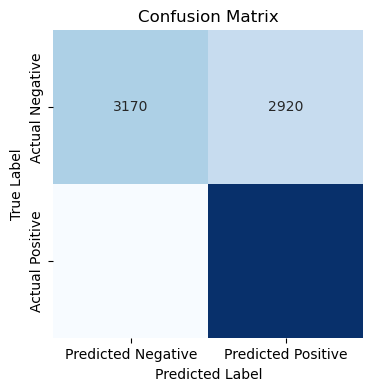

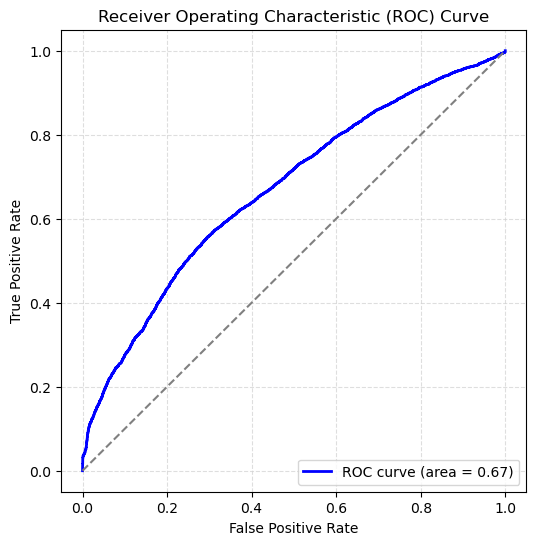

In [52]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[18270     0]
 [    0 22029]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18270
           1       1.00      1.00      1.00     22029

    accuracy                           1.00     40299
   macro avg       1.00      1.00      1.00     40299
weighted avg       1.00      1.00      1.00     40299

    
TEST METRICS
    Confusion Matrix: 
    [[5933  157]
 [ 141 7202]]
    
    AUC: 0.9775090358946905

    Classification Report:
                  precision    recall  f1-score   support

           0       0.98      0.97      0.98      6090
           1       0.98      0.98      0.98      7343

    accuracy                           0.98     13433
   macro avg       0.98      0.98      0.98     13433
weighted avg       0.98      0.98      0.98     13433

    


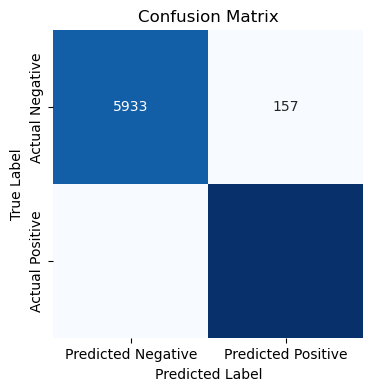

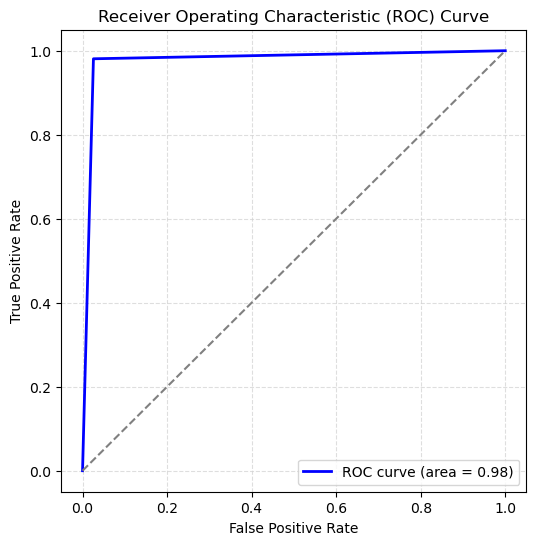

In [53]:
# Step 2: Init the Model
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[18270     0]
 [    0 22029]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18270
           1       1.00      1.00      1.00     22029

    accuracy                           1.00     40299
   macro avg       1.00      1.00      1.00     40299
weighted avg       1.00      1.00      1.00     40299

    
TEST METRICS
    Confusion Matrix: 
    [[6030   60]
 [  69 7274]]
    
    AUC: 0.999289382759448

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      0.99      0.99      6090
           1       0.99      0.99      0.99      7343

    accuracy                           0.99     13433
   macro avg       0.99      0.99      0.99     13433
weighted avg       0.99      0.99      0.99     13433

    


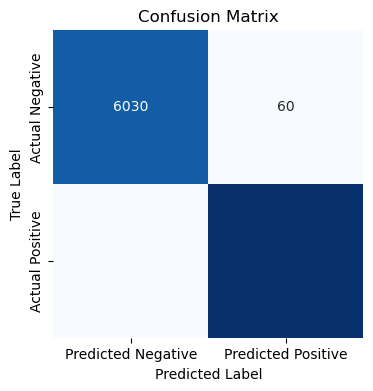

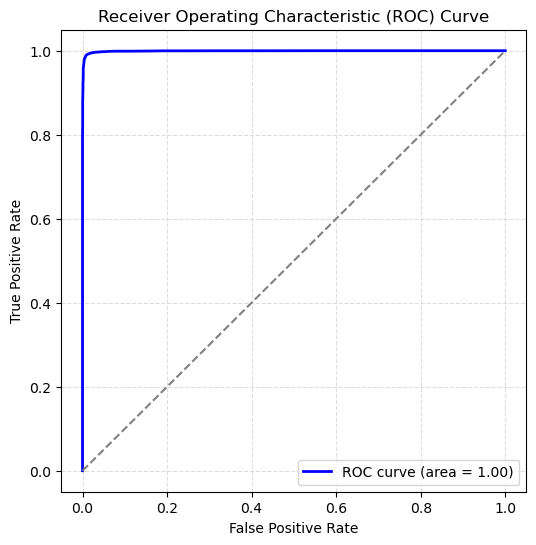

In [54]:
# Step 2: Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[10764  7506]
 [ 6826 15203]]
    
    AUC: 0.667008293516063

    Classification Report:
                  precision    recall  f1-score   support

           0       0.61      0.59      0.60     18270
           1       0.67      0.69      0.68     22029

    accuracy                           0.64     40299
   macro avg       0.64      0.64      0.64     40299
weighted avg       0.64      0.64      0.64     40299

    
TEST METRICS
    Confusion Matrix: 
    [[3625 2465]
 [2301 5042]]
    
    AUC: 0.6714687781690369

    Classification Report:
                  precision    recall  f1-score   support

           0       0.61      0.60      0.60      6090
           1       0.67      0.69      0.68      7343

    accuracy                           0.65     13433
   macro avg       0.64      0.64      0.64     13433
weighted avg       0.64      0.65      0.64     13433

    


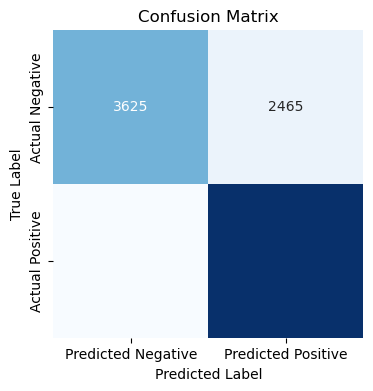

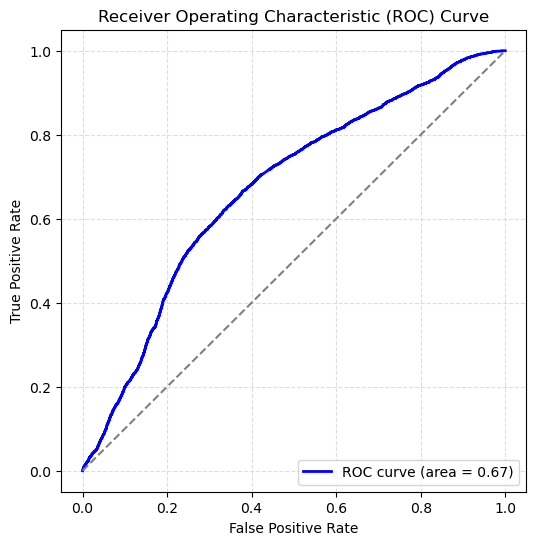

In [55]:
# Step 2: Init the Model
svc = SVC(probability=True)

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[13241  5029]
 [ 4965 17064]]
    
    AUC: 0.842791439795624

    Classification Report:
                  precision    recall  f1-score   support

           0       0.73      0.72      0.73     18270
           1       0.77      0.77      0.77     22029

    accuracy                           0.75     40299
   macro avg       0.75      0.75      0.75     40299
weighted avg       0.75      0.75      0.75     40299

    
TEST METRICS
    Confusion Matrix: 
    [[4125 1965]
 [1960 5383]]
    
    AUC: 0.7970431162504776

    Classification Report:
                  precision    recall  f1-score   support

           0       0.68      0.68      0.68      6090
           1       0.73      0.73      0.73      7343

    accuracy                           0.71     13433
   macro avg       0.71      0.71      0.71     13433
weighted avg       0.71      0.71      0.71     13433

    


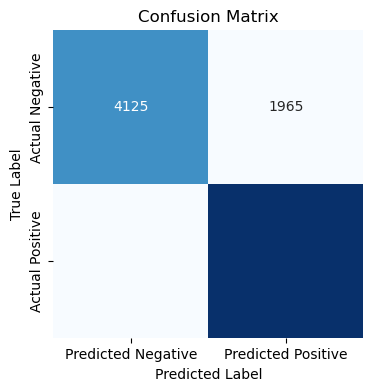

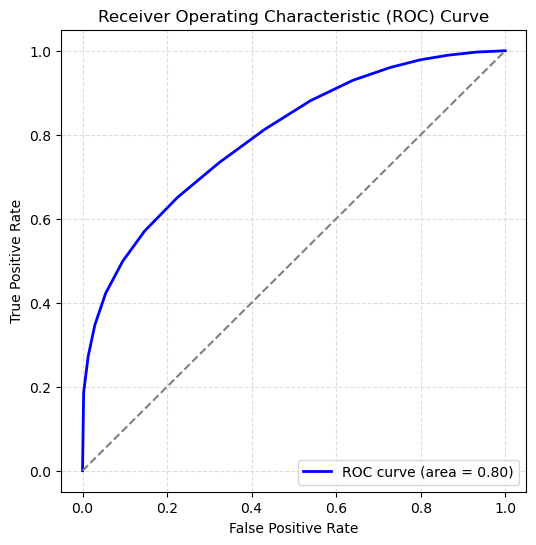

In [56]:
# Step 2: Init the Model
knn = KNeighborsClassifier(n_neighbors=15)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[18270     0]
 [    0 22029]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18270
           1       1.00      1.00      1.00     22029

    accuracy                           1.00     40299
   macro avg       1.00      1.00      1.00     40299
weighted avg       1.00      1.00      1.00     40299

    
TEST METRICS
    Confusion Matrix: 
    [[6031   59]
 [  67 7276]]
    
    AUC: 0.999278224159063

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      0.99      0.99      6090
           1       0.99      0.99      0.99      7343

    accuracy                           0.99     13433
   macro avg       0.99      0.99      0.99     13433
weighted avg       0.99      0.99      0.99     13433

    


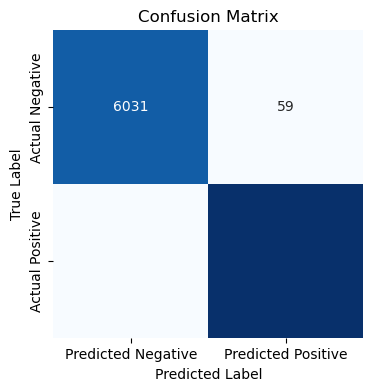

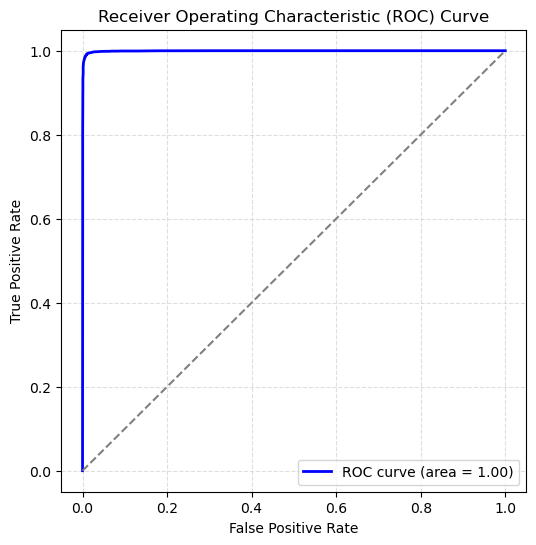

In [57]:
# Step 2: Init the Model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[13093  5177]
 [ 4432 17597]]
    
    AUC: 0.8280918174661689

    Classification Report:
                  precision    recall  f1-score   support

           0       0.75      0.72      0.73     18270
           1       0.77      0.80      0.79     22029

    accuracy                           0.76     40299
   macro avg       0.76      0.76      0.76     40299
weighted avg       0.76      0.76      0.76     40299

    
TEST METRICS
    Confusion Matrix: 
    [[4357 1733]
 [1532 5811]]
    
    AUC: 0.8227000928243492

    Classification Report:
                  precision    recall  f1-score   support

           0       0.74      0.72      0.73      6090
           1       0.77      0.79      0.78      7343

    accuracy                           0.76     13433
   macro avg       0.76      0.75      0.75     13433
weighted avg       0.76      0.76      0.76     13433

    


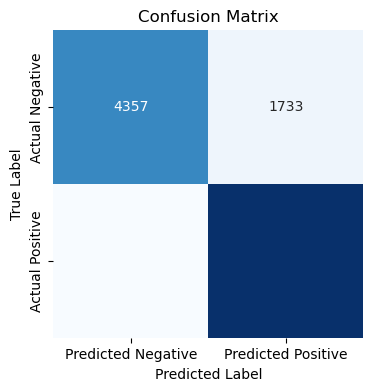

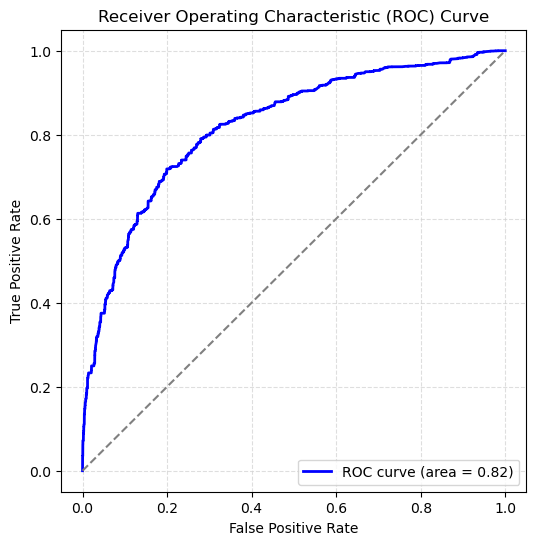

In [58]:
# Step 2: Init the Model
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[16065  2205]
 [ 2490 19539]]
    
    AUC: 0.9479044118661017

    Classification Report:
                  precision    recall  f1-score   support

           0       0.87      0.88      0.87     18270
           1       0.90      0.89      0.89     22029

    accuracy                           0.88     40299
   macro avg       0.88      0.88      0.88     40299
weighted avg       0.88      0.88      0.88     40299

    
TEST METRICS
    Confusion Matrix: 
    [[5336  754]
 [ 884 6459]]
    
    AUC: 0.9443260865044221

    Classification Report:
                  precision    recall  f1-score   support

           0       0.86      0.88      0.87      6090
           1       0.90      0.88      0.89      7343

    accuracy                           0.88     13433
   macro avg       0.88      0.88      0.88     13433
weighted avg       0.88      0.88      0.88     13433

    


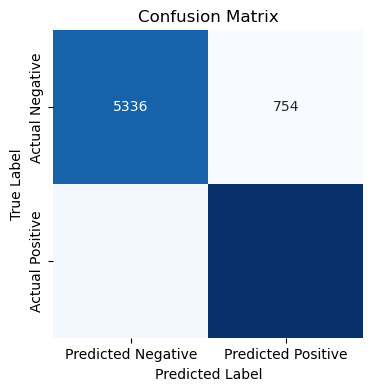

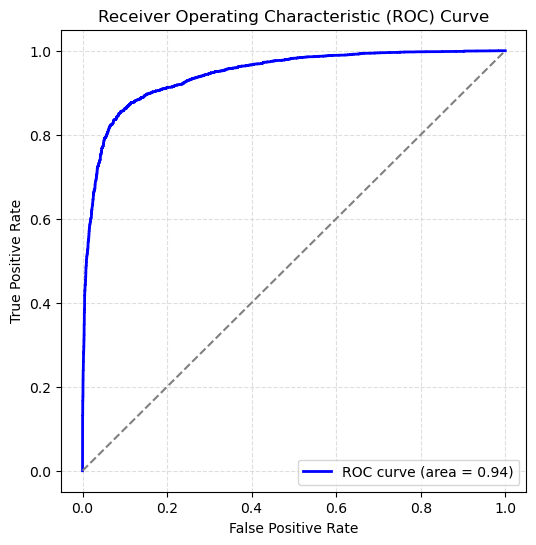

In [59]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [60]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[18155   115]
 [  141 21888]]
    
    AUC: 0.9998211654771738

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      0.99      0.99     18270
           1       0.99      0.99      0.99     22029

    accuracy                           0.99     40299
   macro avg       0.99      0.99      0.99     40299
weighted avg       0.99      0.99      0.99     40299

    
TEST METRICS
    Confusion Matrix: 
    [[6027   63]
 [  79 7264]]
    
    AUC: 0.9991656989543789

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      0.99      0.99      6090
           1       0.99      0.99      0.99      7343

    accuracy                           0.99     13433
   macro avg       0.99      0.99      0.99     13433
weighted avg       0.99      0.99      0.99     13433

    


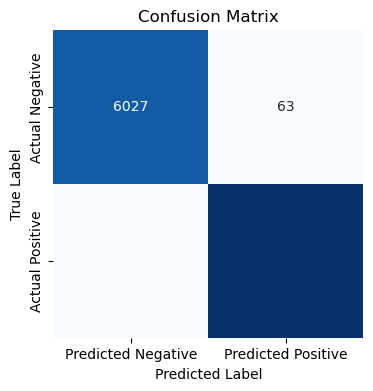

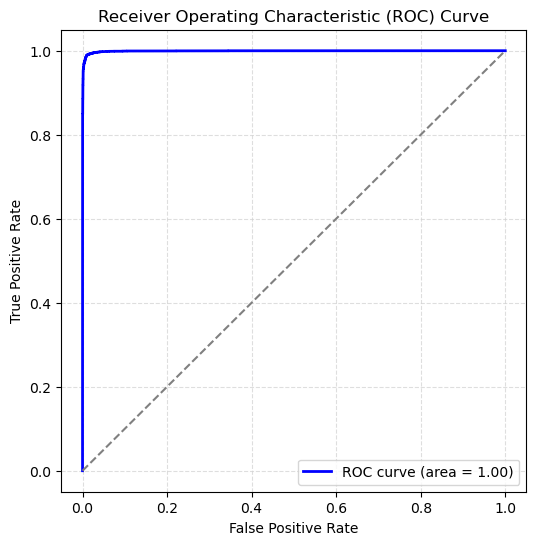

In [61]:
# Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[17966   304]
 [  464 21565]]
    
    AUC: 0.9984208629998427

    Classification Report:
                  precision    recall  f1-score   support

           0       0.97      0.98      0.98     18270
           1       0.99      0.98      0.98     22029

    accuracy                           0.98     40299
   macro avg       0.98      0.98      0.98     40299
weighted avg       0.98      0.98      0.98     40299

    
TEST METRICS
    Confusion Matrix: 
    [[5965  125]
 [ 186 7157]]
    
    AUC: 0.9973126892517633

    Classification Report:
                  precision    recall  f1-score   support

           0       0.97      0.98      0.97      6090
           1       0.98      0.97      0.98      7343

    accuracy                           0.98     13433
   macro avg       0.98      0.98      0.98     13433
weighted avg       0.98      0.98      0.98     13433

    


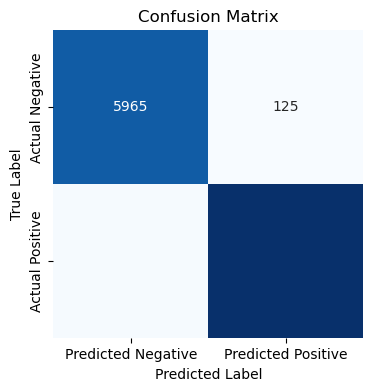

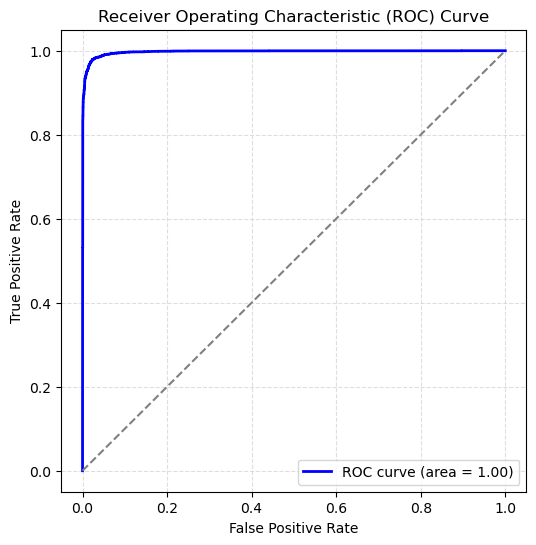

In [62]:
# Step 2: Init the Model
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

In [63]:
fi = pd.DataFrame(list(zip(X.columns, rf.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
5,stem-width,0.226915
2,gill-attachment,0.140512
0,cap-diameter,0.127287
6,stem-color,0.127022
3,gill-color,0.123766
4,stem-height,0.121000
1,cap-shape,0.095449
7,season,0.038049


In [64]:
fi = pd.DataFrame(list(zip(X.columns, et.feature_importances_ / sum(lgbm.feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
5,stem-width,0.000058
2,gill-attachment,0.000052
6,stem-color,0.000051
3,gill-color,0.000049
0,cap-diameter,0.000036
4,stem-height,0.000036
1,cap-shape,0.000036
7,season,0.000016


In [65]:
fi = pd.DataFrame(list(zip(X.columns, xgb.feature_importances_ / sum(lgbm.feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
2,gill-attachment,0.000058
6,stem-color,0.000053
7,season,0.000046
5,stem-width,0.000045
3,gill-color,0.000043
1,cap-shape,0.000040
4,stem-height,0.000030
0,cap-diameter,0.000018


In [66]:
fi = pd.DataFrame(list(zip(X.columns, lgbm.feature_importances_ / sum(lgbm.feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
5,stem-width,0.214000
2,gill-attachment,0.181667
6,stem-color,0.144000
3,gill-color,0.137667
0,cap-diameter,0.111667
1,cap-shape,0.091000
4,stem-height,0.088333
7,season,0.031667


In [72]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X,y)

RandomForestClassifier(random_state=42)

In [74]:
# Save off my models
import pickle

# Scaler
pickle.dump(scaler, open("mushroom_scaler.h5", 'wb'))

# Model ######WHATEVER MODEL WE CHOOSE###################### THEN SAVE 
pickle.dump(rf, open("mushroom_model.h5", 'wb'))